<a href="https://colab.research.google.com/github/Muppidathe/ml_project/blob/master/linear_regression_with_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import anderson,pearsonr,spearmanr

# EDA

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/santhoshkumaroff/MachineLearningDatasets/a7a1f5f6d52bae8b9c62c7a81fe2729622c58705/Salary_predict.csv ")
df.head()

,experience,age,interview_score,Salary
0,4,30,8.0,50000
1,3,23,4.0,22000
2,2,25,5.0,30000
3,4,33,9.0,55000
4,1,20,5.0,13000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       20 non-null     int64  
 1   age              20 non-null     int64  
 2   interview_score  20 non-null     float64
 3   Salary           20 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 772.0 bytes


# analysing expereince column

<Axes: xlabel='experience', ylabel='Density'>

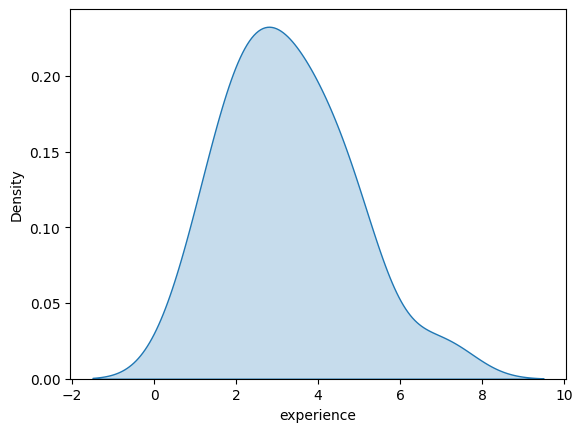

In [ ]:
sns.kdeplot(data=df,x="experience",fill=True)

<Axes: ylabel='experience'>

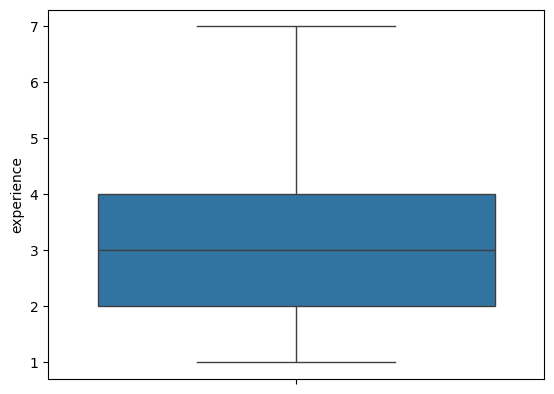

In [ ]:
sns.boxplot(data=df,y="experience")

<Axes: ylabel='experience'>

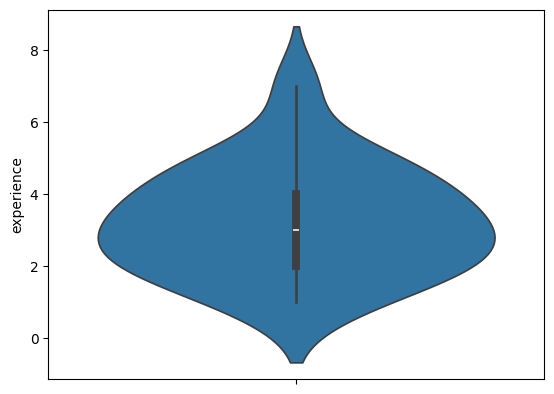

In [ ]:
sns.violinplot(data=df,y="experience")

In [ ]:
result=anderson(df["experience"],dist="norm")
result

AndersonResult(statistic=0.5149650198430784, critical_values=array([0.506, 0.577, 0.692, 0.807, 0.96 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.25, scale=1.51744244666721)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
index_of_5_percent_signi=np.where(result.significance_level==5.)[0][0]
critical_value_5_percent=result.critical_values[index_of_5_percent_signi]
if (critical_value_5_percent>result.statistic):
    print("accept null hypothesis(normal distribution only)")
else:
    print("reject null hypothesis(non-normal distribution)")

accept null hypothesis(normal distribution only)


# analysing age column

<Axes: xlabel='age', ylabel='Density'>

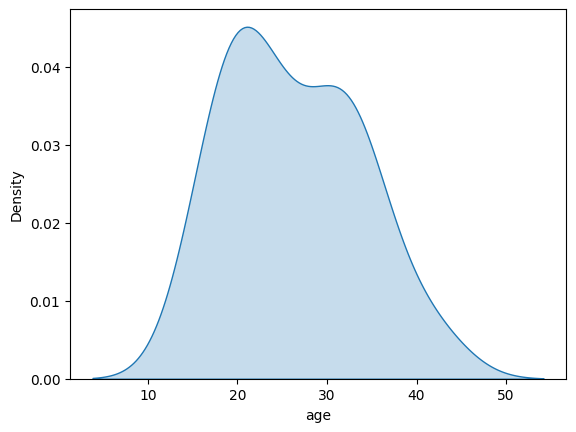

In [ ]:
sns.kdeplot(data=df,x="age",fill=True)

In [ ]:
result=anderson(df["age"],dist="norm")
index_of_5_percent_signi=np.where(result.significance_level==5.)[0][0]
critical_value_5_percent=result.critical_values[index_of_5_percent_signi]
if (critical_value_5_percent>result.statistic):
    print("accept null hypothesis(normal distribution only)")
else:
    print("reject null hypothesis(non-normal distribution)")

accept null hypothesis(normal distribution only)


# analysing interview_score column

<Axes: xlabel='interview_score', ylabel='Density'>

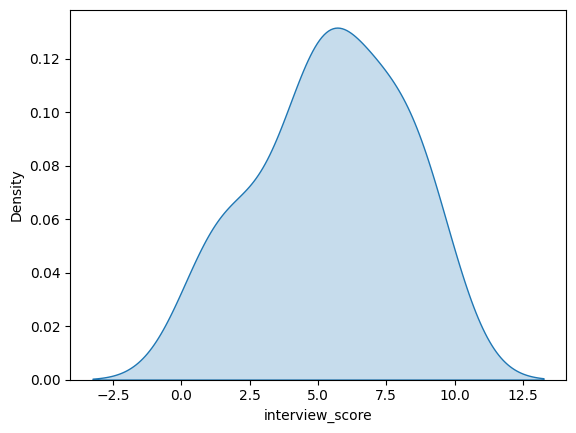

In [ ]:
sns.kdeplot(data=df,x="interview_score",fill=True)

In [ ]:
result=anderson(df["interview_score"],dist="norm")
index_of_5_percent_signi=np.where(result.significance_level==5.)[0][0]
critical_value_5_percent=result.critical_values[index_of_5_percent_signi]
if (critical_value_5_percent>result.statistic):
    print("accept null hypothesis(normal distribution only)")
else:
    print("reject null hypothesis(non-normal distribution)")

accept null hypothesis(normal distribution only)


# analysing salary column

<Axes: xlabel='Salary', ylabel='Density'>

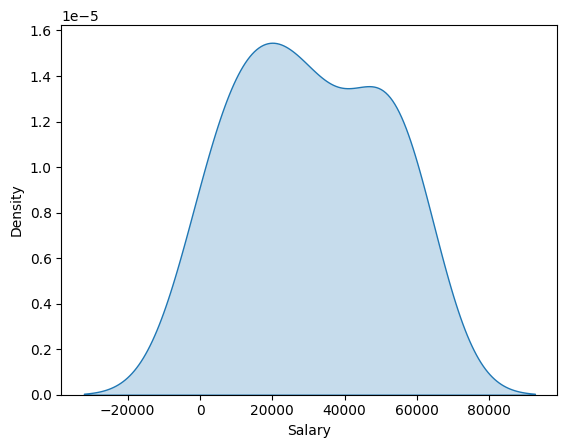

In [ ]:
sns.kdeplot(data=df,x="Salary",fill=True)

In [ ]:
result=anderson(df["Salary"],dist="norm")
index_of_5_percent_signi=np.where(result.significance_level==5.)[0][0]
critical_value_5_percent=result.critical_values[index_of_5_percent_signi]
if (critical_value_5_percent>result.statistic):
    print("accept null hypothesis(normal distribution only)")
else:
    print("reject null hypothesis(non-normal distribution)")

accept null hypothesis(normal distribution only)


# by above test we can say all the column are following normal distribution

## so we can now go with feature selection

### we need to use pearson(normal) or spearman(non-linear/non-normal) so first i need to check wheather it is linear or non-linear we can use scatter plot to find linear pattern

<Axes: xlabel='experience', ylabel='Salary'>

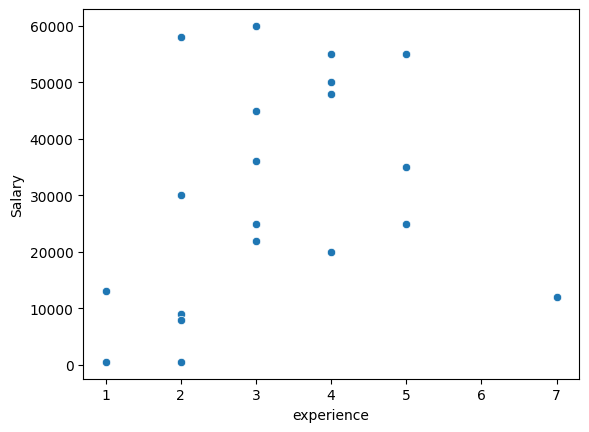

In [ ]:
sns.scatterplot(x=df["experience"],y=df["Salary"])

# above pattern seems non-linear pattern

# we can't come to conclusion by visual method so i use statistical method

In [ ]:
pearson,_=pearsonr(df['experience'], df['Salary'])
spearman,_=spearmanr(df['experience'], df['Salary'])
if pearson>spearman:
    print("pearson is better")
    print("score is ",pearson)
else:
    print("spearman is better")
    print("score is ",spearman)

spearman is better
score is  0.3851653159119939


<Axes: xlabel='age', ylabel='Salary'>

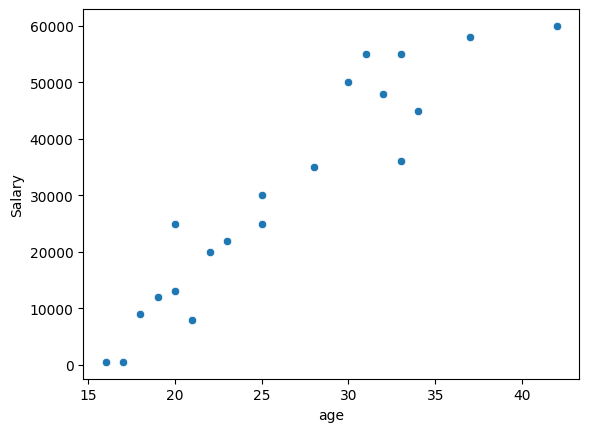

In [ ]:
sns.scatterplot(x=df["age"],y=df["Salary"])

In [ ]:
pearson,_=pearsonr(df['age'], df['Salary'])
spearman,_=spearmanr(df['age'], df['Salary'])
if pearson>spearman:
    print("pearson is better")
    print("score is ",pearson)
else:
    print("spearman is better")
    print("score is ",spearman)

pearson is better
score is  0.9408900306608956


<Axes: xlabel='interview_score', ylabel='Salary'>

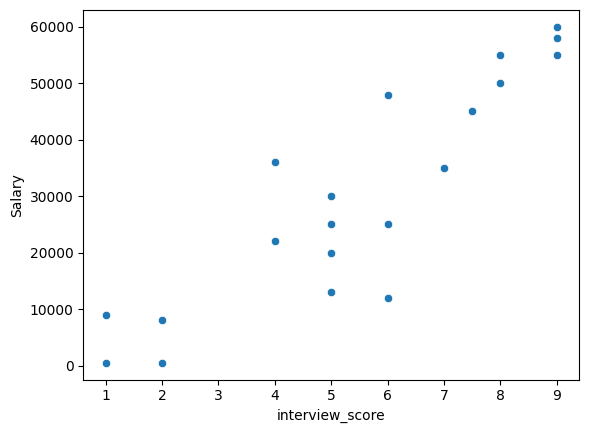

In [ ]:
sns.scatterplot(x=df["interview_score"],y=df["Salary"])

In [ ]:
pearson,_=pearsonr(df['interview_score'], df['Salary'])
spearman,_=spearmanr(df['interview_score'], df['Salary'])
if pearson>spearman:
    print("pearson is better")
    print("score is ",pearson)
else:
    print("spearman is better")
    print("score is ",spearman)

pearson is better
score is  0.8908151525498591


# experience column having very low score and non-linear relationship so we can drop this feature other two column are pretty cool

In [ ]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,age,interview_score
8,42,9.0
5,18,1.0
11,17,1.0
3,33,9.0
18,22,5.0
16,37,9.0
13,33,4.0
2,25,5.0
9,34,7.5
19,28,7.0


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
print("actual value \t predicted value")
for j,k in zip(y_test,y_pred):
    print(j,k)


actual value 	 predicted value
50000 42874.98832935179
12000 19598.736728443306
55000 44472.308088875536
22000 20282.281520391167


In [ ]:
y_pred=model.predict(x_test)
print("actual value \t predicted value")
for j,k in zip(y_test,y_pred):
    print(j,k)


actual value 	 predicted value
50000 42874.98832935179
12000 19598.736728443306
55000 44472.308088875536
22000 20282.281520391167


In [ ]:
mse=mean_squared_error(y_test,y_pred)
mse

55572361.2314529